## Setup Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Dataset Import + Initial Cleaning

### Initial Data Check

In [2]:
crash_df = pd.read_csv('./data/VDOT_crash.csv')

In [3]:
crash_df.head()

,OBJECTID,Document Nbr,Crash Year,Crash Date,Crash Military Time,Crash Severity,K_People,A_People,B_People,C_People,...,VSP,Ownership,Planning District,MPO Name,RTE Name,RNS MP,Node,Node Offset (ft),x,y
0,1,170785244,2017,3/15/2017 4:00:00 AM,845,O,0,0,0,0,...,5,3. City or Town Hwy Agency,Hampton Roads,HAMP,S-VA121PR IVY AVE,0.59,731559.0,48.57,-76.415070,36.975935
1,2,173135321,2017,11/3/2017 4:00:00 AM,1718,O,0,0,0,0,...,1,1. State Hwy Agency,"Richmond Regional, Crater",RICH,R-VA020SC00651WB,9.83,203463.0,9.78,-77.509985,37.455126
2,3,173035461,2017,10/30/2017 4:00:00 AM,734,O,0,0,0,0,...,2,1. State Hwy Agency,Northern Shenandoah Valley,NaN,R-VA US00340NB,94.18,713190.0,84.94,-78.197568,38.908610
3,4,172925444,2017,10/19/2017 4:00:00 AM,511,O,0,0,0,0,...,1,1. State Hwy Agency,George Washington Regional,NaN,R-VA US00301NB,111.82,1168608.0,174.41,-77.341817,38.034672
4,5,172245260,2017,8/12/2017 4:00:00 AM,218,O,0,0,0,0,...,5,3. City or Town Hwy Agency,Hampton Roads,HAMP,R-VA SR00337WB,1.26,469440.0,16.97,-76.577218,36.726416


So, our group decided to filter the crash year to be any time newer than 2021 to get a more accurate understanding of more recent times and trends.

In [4]:
filtered_crash_df = crash_df[crash_df["Crash Year"] >= 2021]
filtered_crash_df.head()

,OBJECTID,Document Nbr,Crash Year,Crash Date,Crash Military Time,Crash Severity,K_People,A_People,B_People,C_People,...,VSP,Ownership,Planning District,MPO Name,RTE Name,RNS MP,Node,Node Offset (ft),x,y
492995,492996,210235155,2021,1/23/2021 5:00:00 AM,1528,B,0,0,2,0,...,6,1. State Hwy Agency,West Piedmont,NaN,R-VA SR00057EB,11.59,1207241.0,10.67,-80.078479,36.751090
492996,492997,213645296,2021,12/30/2021 5:00:00 AM,1206,B,0,0,1,0,...,2,3. City or Town Hwy Agency,George Washington Regional,FRED,R-VA SR00003WBBUS001,0.02,1010915.0,236.85,-77.480568,38.294743
492997,492998,211415254,2021,5/20/2021 4:00:00 AM,1613,O,0,0,0,0,...,1,1. State Hwy Agency,Richmond Regional,RICH,R-VA IS00095SB,78.38,NaN,NaN,-77.461825,37.575069
492998,492999,211615171,2021,6/3/2021 4:00:00 AM,1452,O,0,0,0,0,...,5,1. State Hwy Agency,Hampton Roads,HAMP,R-VA IS00064WB,263.98,NaN,NaN,-76.391991,37.038167
492999,493000,211405033,2021,5/18/2021 4:00:00 AM,1755,O,0,0,0,0,...,7,1. State Hwy Agency,Northern Virginia,NOVA,R-VA IS00066WB,54.52,NaN,NaN,-77.413541,38.850280


In [5]:
filtered_crash_df.columns

Index(['OBJECTID', 'Document Nbr', 'Crash Year', 'Crash Date',
       'Crash Military Time', 'Crash Severity', 'K_People', 'A_People',
       'B_People', 'C_People', 'Persons Injured', 'Pedestrians Killed',
       'Pedestrians Injured', 'Vehicle Count', 'Collision Type',
       'Weather Condition', 'Light Condition', 'Roadway Surface Condition',
       'Relation To Roadway', 'Roadway Alignment', 'Roadway Surface Type',
       'Roadway Defect', 'Roadway Description', 'Intersection Type',
       'Traffic Control Type', 'Traffic Control Status', 'Work Zone Related',
       'Work Zone Location', 'Work Zone Type', 'School Zone',
       'First Harmful Event', 'First Harmful Event Loc', 'Alcohol?',
       'Animal Related?', 'Unrestrained?', 'Bike?', 'Distracted?', 'Drowsy?',
       'Drug Related?', 'Guardrail Related?', 'Hitrun?', 'Lgtruck?',
       'Motorcycle?', 'Pedestrian?', 'Speed?', 'Max Speed Diff',
       'RoadDeparture Type', 'Intersection Analysis', 'Senior?', 'Young?',
       'Main

And now, we decided to drop a few columns that don't actually matter too much. That includes some metadata like object ID, dates that don't really matter, location/jurisdiction information, virginia state patrol numbers, etc. that are irrelevant features for the actual model we intend on training!

In [6]:
dropped_crash = filtered_crash_df.drop(columns=['OBJECTID', 'Document Nbr', 'Crash Year', 'Crash Date', 'Crash Military Time', 'Work Zone Location', 'Work Zone Type', 'VDOT District', 'Juris Code', 'Physical Juris Name', 'VSP', 'Ownership', 'Planning District', 'MPO Name', 'RTE Name', 'RNS MP', 'Node', 'Node Offset (ft)'])
dropped_crash.head()

,Crash Severity,K_People,A_People,B_People,C_People,Persons Injured,Pedestrians Killed,Pedestrians Injured,Vehicle Count,Collision Type,...,Senior?,Young?,Mainline?,Night?,Functional Class,Facility Type,Area Type,SYSTEM,x,y
492995,B,0,0,2,0,2,0,0,2,3. Head On,...,Yes,Yes,Yes,No,"4-Minor Arterial (H,3)",3-Two-Way Undivided,Rural,VDOT Primary,-80.078479,36.751090
492996,B,0,0,1,0,1,0,0,2,1. Rear End,...,Yes,No,Yes,No,"4-Minor Arterial (H,3)",4-Two-Way Divided,Urban,NonVDOT primary,-77.480568,38.294743
492997,O,0,0,0,0,0,0,0,3,1. Rear End,...,No,No,Yes,No,"1-Interstate (A,1)",4-Two-Way Divided,Urban,VDOT Interstate,-77.461825,37.575069
492998,O,0,0,0,0,0,0,0,1,9. Fixed Object - Off Road,...,No,No,Yes,No,"1-Interstate (A,1)",4-Two-Way Divided,Urban,VDOT Interstate,-76.391991,37.038167
492999,O,0,0,0,0,0,0,0,3,1. Rear End,...,No,No,Yes,No,"1-Interstate (A,1)",4-Two-Way Divided,Urban,VDOT Interstate,-77.413541,38.850280


In [7]:
dropped_crash['Crash Severity'].unique()

array(['B', 'O', 'A', 'C', 'K'], dtype=object)

Ok so the crash severities are actually:  
K: Fatal  
B: Visible Injury  
A: Severe  
C: Nonvisible Injury  
O: Property Damage Only  
according to the [VDOT details set](https://www.virginiaroads.org/datasets/VDOT::crash-data-1/explore?layer=1). So I'll change them to that for the purposes of better visualization.

In [8]:
dropped_crash['Crash Severity'] = dropped_crash['Crash Severity'].replace({'K': 'Fatal', 'B': 'Visible Injury', 'A': 'Severe Injury', 'C': 'Nonvisible Injury', 'O': 'Property Damage Only'})

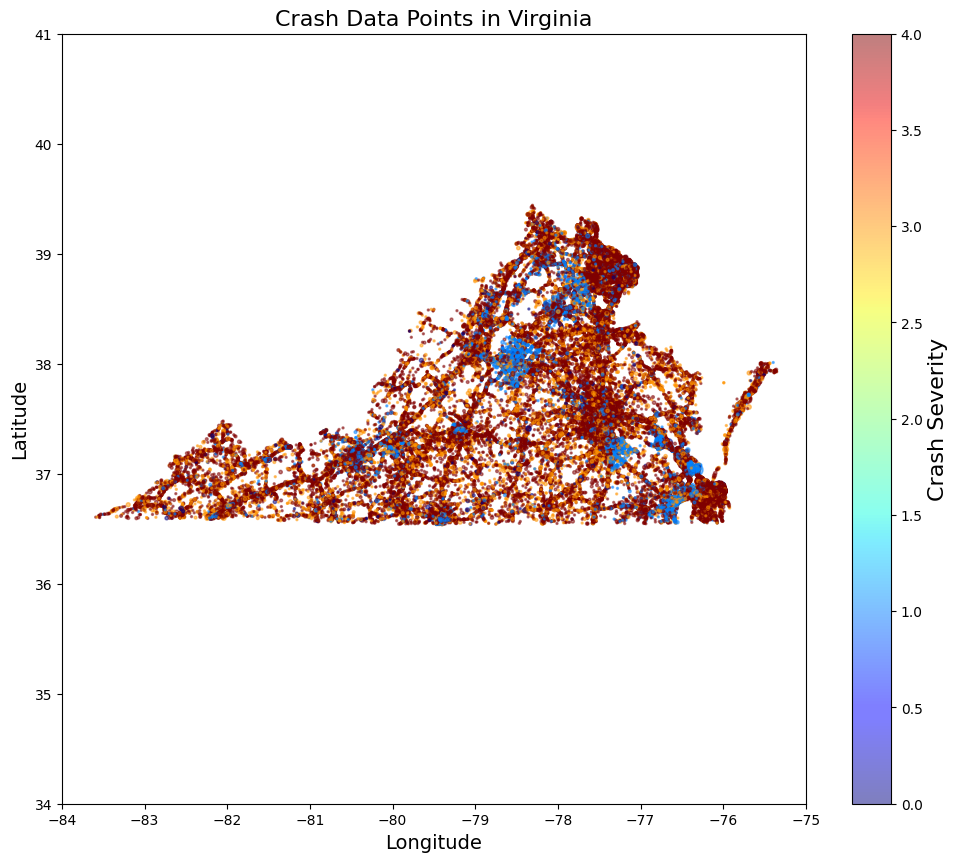

In [31]:
%matplotlib inline
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib.image as mpimg

#Plotting locations of the crashes, highlighting the number of people injured (by the size of the point) and crash severity (by the color)
crash_data = dropped_crash.copy()
crash_data = crash_data.dropna(subset=['x', 'y'])
plt.figure(figsize=(12, 10))

plt.scatter(
    crash_data['x'],
    crash_data['y'],
    s=crash_data['Persons Injured'] * 2,
    c=crash_data['Crash Severity'].astype('category').cat.codes,
    cmap=plt.get_cmap("jet"),
    alpha=0.5
)

plt.title('Crash Data Points in Virginia', fontsize=16)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
cbar = plt.colorbar()
cbar.set_label('Crash Severity', fontsize=16)
plt.xlim(-84, -75)
plt.ylim(34, 41)
plt.show()

And some basic visualizations - both of the histogram of numerical datapoints to see what the trend of the data seems to be, as well as a map visualization because I think it looks cool :)

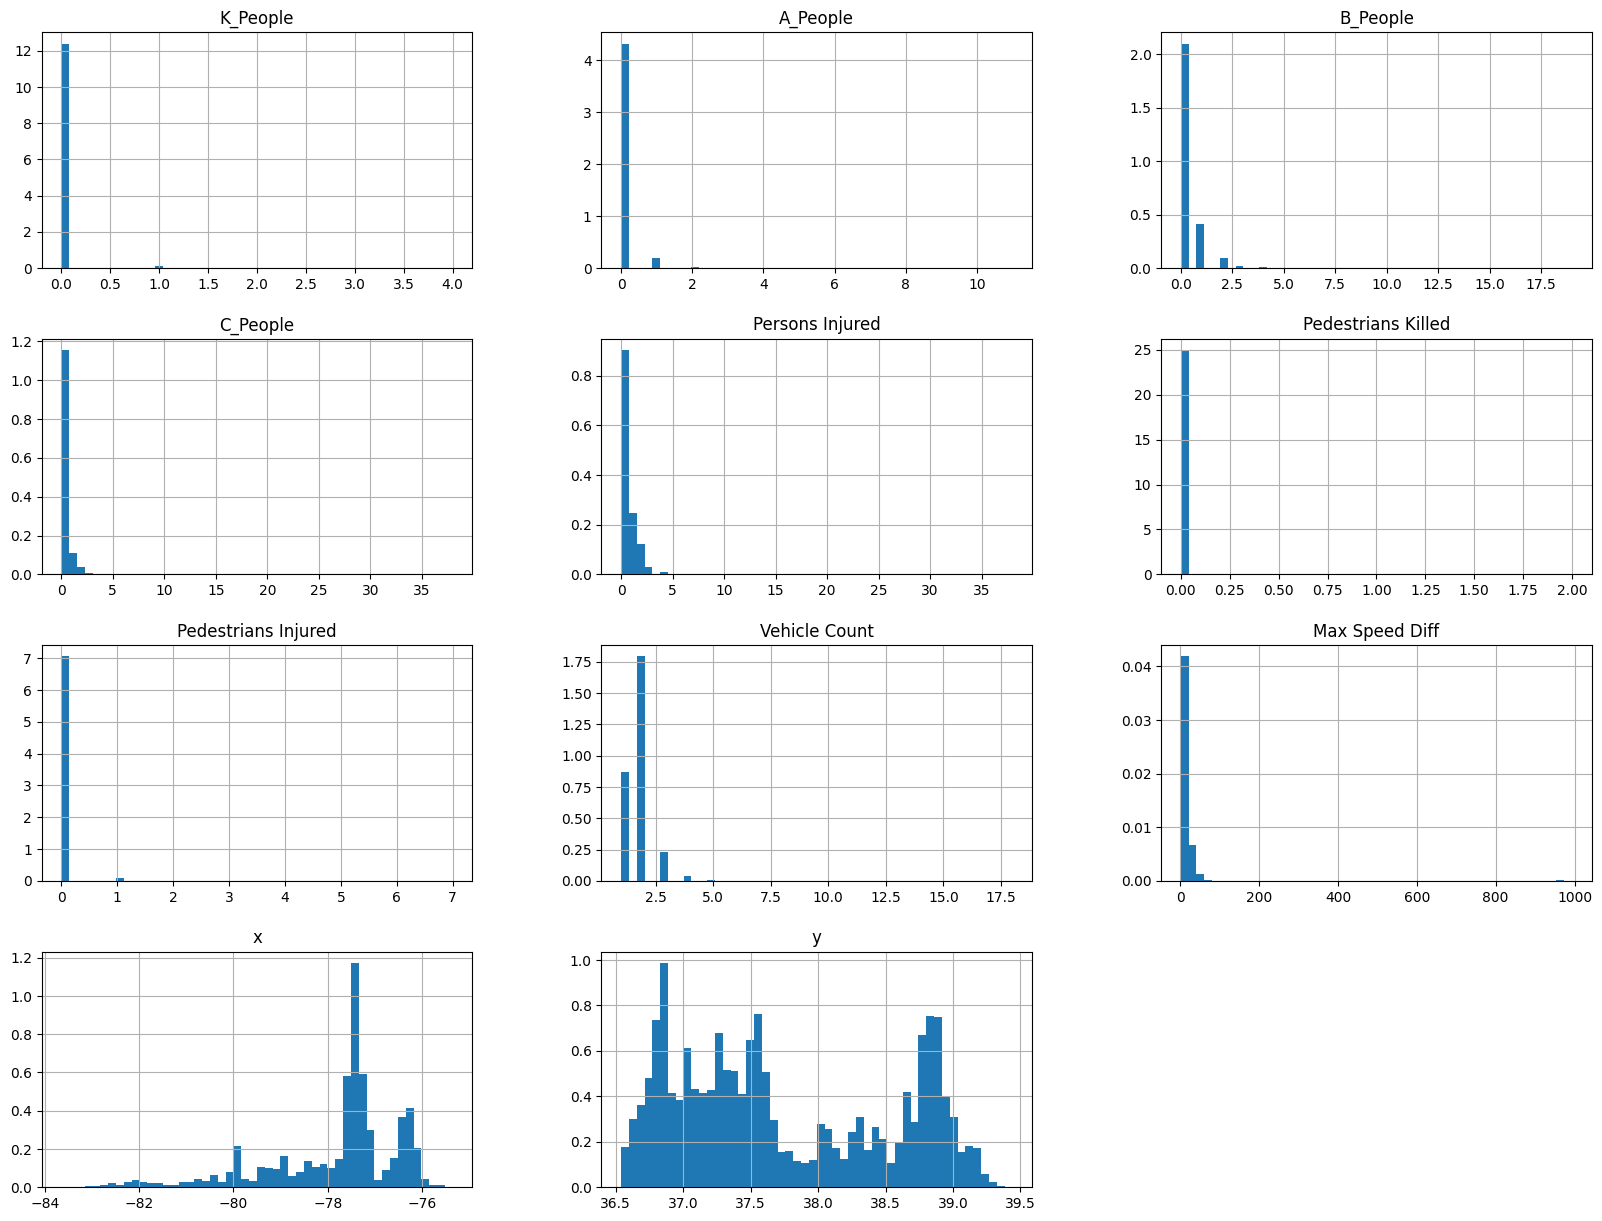

In [10]:
dropped_crash.hist(bins=50, figsize=(20,15), density=True)
plt.show()

### Null Handling

In [11]:
dropped_crash.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535585 entries, 492995 to 1028579
Data columns (total 51 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Crash Severity             535585 non-null  object 
 1   K_People                   535585 non-null  int64  
 2   A_People                   535585 non-null  int64  
 3   B_People                   535585 non-null  int64  
 4   C_People                   535585 non-null  int64  
 5   Persons Injured            535585 non-null  int64  
 6   Pedestrians Killed         535585 non-null  int64  
 7   Pedestrians Injured        535585 non-null  int64  
 8   Vehicle Count              535585 non-null  int64  
 9   Collision Type             535585 non-null  object 
 10  Weather Condition          535585 non-null  object 
 11  Light Condition            535585 non-null  object 
 12  Roadway Surface Condition  535585 non-null  object 
 13  Relation To Roadway        5

In [12]:
dropped_crash.isnull().sum()

Crash Severity                    0
K_People                          0
A_People                          0
B_People                          0
C_People                          0
Persons Injured                   0
Pedestrians Killed                0
Pedestrians Injured               0
Vehicle Count                     0
Collision Type                    0
Weather Condition                 0
Light Condition                   0
Roadway Surface Condition         0
Relation To Roadway               0
Roadway Alignment                 2
Roadway Surface Type              0
Roadway Defect                    0
Roadway Description               0
Intersection Type                 0
Traffic Control Type              0
Traffic Control Status            0
Work Zone Related                 0
School Zone                       0
First Harmful Event               0
First Harmful Event Loc           0
Alcohol?                          0
Animal Related?                   0
Unrestrained?               

Ok. Looks like there are a couple nulls. It's truncated, but from looking at it in a text editor:

Roadway Alignment - 2  
Max Speed Diff - 427108   
Functional Class - 6969   
Facility Type - 10695  
x - 5    
y - 5   

So going down the list one by one:

Let's start with Roadway Alignment.

In [13]:
dropped_crash['Roadway Alignment'].unique()

array(['1. Straight - Level', '6. Hillcrest - Curve',
       '3. Grade - Straight', '2. Curve - Level', '4. Grade - Curve',
       '7. Dip - Straight', '5. Hillcrest - Straight', '10. On/Off Ramp',
       '8. Dip - Curve', '9. Other', nan], dtype=object)

Honestly there's only 2 NaNs, let's just drop them in this case.

In [14]:
dropped_crash = dropped_crash.dropna(subset=['Roadway Alignment'])

Let's take a look at the Max Speed Diff description.

In [15]:
dropped_crash['Max Speed Diff'].describe()

count    108476.000000
mean         16.711964
std          54.052119
min           1.000000
25%           5.000000
50%          10.000000
75%          20.000000
max         994.000000
Name: Max Speed Diff, dtype: float64

Ah. That's probably it - the data only shows cases where the max speed difference is greater than 1. That is, if the driver was going under speed or at speed, it was likely put in as NaN - there's no way to particularly impute under speed values since there's no way to know, but imputing 0 here should be fair!

In [16]:
filled_crash = dropped_crash.copy()
filled_crash['Max Speed Diff'] = filled_crash['Max Speed Diff'].fillna(0)

Great - next up on the list is the Functional Class entries. Here's what they are:

In [17]:
filled_crash['Functional Class'].unique()

array(['4-Minor Arterial (H,3)', '1-Interstate (A,1)',
       '3-Principal Arterial - Other (E,2)', nan, '7-Local (J,6)',
       '6-Minor Collector (5)', '5-Major Collector (I,4)',
       '2-Principal Arterial - Other Freeways and Expressways (B)'],
      dtype=object)

Ok... little bit weird here. So functional class seems to be roughly what kind of place the crash occurred. I suppose in this case we can only consider one of two options - impute 'Unknown' or drop the columns. Since there are more than 10% of these being NaN's, let's just impute 'Unknown'.

In [18]:
filled_crash['Functional Class'] = filled_crash['Functional Class'].fillna('Unknown')

Let's now move onto Facility Type.

In [19]:
filled_crash['Facility Type'].unique()

array(['3-Two-Way Undivided', '4-Two-Way Divided', '1-One-Way Undivided',
       nan, '2-One-Way Divided', '5-Reversible Exclusively (e.g. 395R)'],
      dtype=object)

Ah man. Another one similar to functional class - for the sake of the argument but double this time, if we drop this that's losing about 20% of our potential data points. So I'll just impute 'Unknown'.

In [20]:
filled_crash['Facility Type'] = filled_crash['Facility Type'].fillna('Unknown')

And lastly, for x and y?

In [21]:
filled_crash['x'].describe()

count    535578.000000
mean        -77.841877
std           1.412125
min         -83.647464
25%         -78.432405
50%         -77.457760
75%         -77.112222
max         -75.349082
Name: x, dtype: float64

In [22]:
filled_crash['y'].describe()

count    535578.000000
mean         37.744275
std           0.794399
min          36.539198
25%          37.043891
50%          37.535824
75%          38.590427
max          39.440270
Name: y, dtype: float64

Yeah... there's no obvious reason. Well, it's only 5 entries and obviously we can't do anything with imputation, so let's just drop these as it shouldn't affect things too much!

In [23]:
filled_crash = filled_crash.dropna(subset=['x','y'])

In [24]:
filled_crash.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535578 entries, 492995 to 1028579
Data columns (total 51 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Crash Severity             535578 non-null  object 
 1   K_People                   535578 non-null  int64  
 2   A_People                   535578 non-null  int64  
 3   B_People                   535578 non-null  int64  
 4   C_People                   535578 non-null  int64  
 5   Persons Injured            535578 non-null  int64  
 6   Pedestrians Killed         535578 non-null  int64  
 7   Pedestrians Injured        535578 non-null  int64  
 8   Vehicle Count              535578 non-null  int64  
 9   Collision Type             535578 non-null  object 
 10  Weather Condition          535578 non-null  object 
 11  Light Condition            535578 non-null  object 
 12  Roadway Surface Condition  535578 non-null  object 
 13  Relation To Roadway        5

In [25]:
filled_crash.isnull().sum()

Crash Severity               0
K_People                     0
A_People                     0
B_People                     0
C_People                     0
Persons Injured              0
Pedestrians Killed           0
Pedestrians Injured          0
Vehicle Count                0
Collision Type               0
Weather Condition            0
Light Condition              0
Roadway Surface Condition    0
Relation To Roadway          0
Roadway Alignment            0
Roadway Surface Type         0
Roadway Defect               0
Roadway Description          0
Intersection Type            0
Traffic Control Type         0
Traffic Control Status       0
Work Zone Related            0
School Zone                  0
First Harmful Event          0
First Harmful Event Loc      0
Alcohol?                     0
Animal Related?              0
Unrestrained?                0
Bike?                        0
Distracted?                  0
Drowsy?                      0
Drug Related?                0
Guardrai

And so now all the nulls are handled, and we have dropped all irrelevant columns. Great!

### Saving Filtered Dataset

In [26]:
filled_crash.to_csv('./data/VDOT_crash_cleaned.csv', index=False)

### imputing pipeline

In [ ]:
filled_crash.head()

array(['Visible Injury', 'Property Damage Only', 'Severe Injury',
       'Nonvisible Injury', 'Fatal'], dtype=object)

In [28]:
def normalize_not_applicable(df):
    obj_cols = df.select_dtypes(exclude=[np.number]).columns
    for c in obj_cols:
        s = df[c].astype(str).str.strip().str.casefold()
        df.loc[s.eq("not applicable"), c] = np.nan
    return df

In [33]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Load cleaned data
new_crashes = filled_crash.copy()
new_crashes = normalize_not_applicable(new_crashes)

new_crashes_rf = new_crashes.copy()

# Custom Transformer for Weighted Injury Score
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, k_weight=4, a_weight=3, b_weight=2, c_weight=1):  # default weights
        self.k_weight = k_weight
        self.a_weight = a_weight
        self.b_weight = b_weight
        self.c_weight = c_weight

    def fit(self, X, y=None):
        return self  # No fitting needed

    def transform(self, X):
        X = X.copy()
        weighted_score = (self.k_weight * X['K_People'] +
                          self.a_weight * X['A_People'] +
                          self.b_weight * X['B_People'] +
                          self.c_weight * X['C_People'])
        X['Weighted_injury_score'] = weighted_score
        return X

# Map severity labels to numerical values
severity_mapping = {
    "K. Fatal Injury": 4,
    "A. Severe Injury": 3,
    "B. Visible Injury": 2,
    "C. Nonvisible Injury": 1,
    "PDO. Property Damage Only": 0
}

# Split data into features and target
target = 'Crash Severity'
X_rf = new_crashes.drop(columns=[target])
y_rf = new_crashes[target]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train_rf = label_encoder.fit_transform(y_train_rf)
y_test_rf = label_encoder.transform(y_test_rf)

# Separate numerical and categorical features
num_features_rf = X_train_rf.select_dtypes(include=[np.number]).columns
cat_features_rf = X_train_rf.select_dtypes(exclude=[np.number]).columns

# Preprocessing Pipeline for RF model
pre_pipeline_rf = ColumnTransformer([
    ("num_pipeline", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),  # Impute missing values
        ("scaler", StandardScaler())  # Scale numerical features
    ]), num_features_rf),
    ("cat_pipeline", OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features_rf)  # One-hot encode categorical features
])

# Full Pipeline for RF
full_pipeline_rf = Pipeline([
    ("combined_attributes_adder", CombinedAttributesAdder()),  # Add derived feature
    ("preprocessing", pre_pipeline_rf)  # Apply preprocessing pipeline
])

# Prepare the data (RF)
X_train_prepared_rf = full_pipeline_rf.fit_transform(X_train_rf)
X_test_prepared_rf = full_pipeline_rf.transform(X_test_rf)

# Compute class weights for imbalanced data (RF)
class_weights_rf = compute_class_weight('balanced', classes=np.unique(y_train_rf), y=y_train_rf)
class_weights_dict_rf = dict(enumerate(class_weights_rf))

Now that our data is cleaned and preprocessed from our pipeline, we can begin using it to train our models. A first model we can use to predict our data is the random forest model, as it can handle classficiation problems with complex relationships and many features quite effectively. 

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

random_forest_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight=class_weights_dict_rf,
)

random_forest_model.fit(X_train_prepared_rf, y_train_rf)
y_pred_rf = random_forest_model.predict(X_test_prepared_rf)

# superrr high overfitting
print("Random Forest Accuracy: ", accuracy_score(y_test_rf, y_pred_rf))
print("Confusion Matrix: ", confusion_matrix(y_test_rf, y_pred_rf))

Random Forest Accuracy:  0.9999719929795735
Confusion Matrix:  [[  702     0     2     0     1]
 [    0  7719     0     0     0]
 [    0     0 73318     0     0]
 [    0     0     0  5014     0]
 [    0     0     0     0 20360]]
